## **DATA MENTAH**

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
data = pd.read_csv('data iris.csv', delimiter=";")

# Lihat informasi awal dataset
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
# Memisahkan fitur (X) dan target (y)
X = data.iloc[:, :-1]  # Semua kolom kecuali target
y = data.iloc[:, -1]   # Kolom target

In [23]:
# Membagi data menjadi data train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Data train: {len(X_train)} samples")
print(f"Data test: {len(X_test)} samples")


Data train: 105 samples
Data test: 45 samples


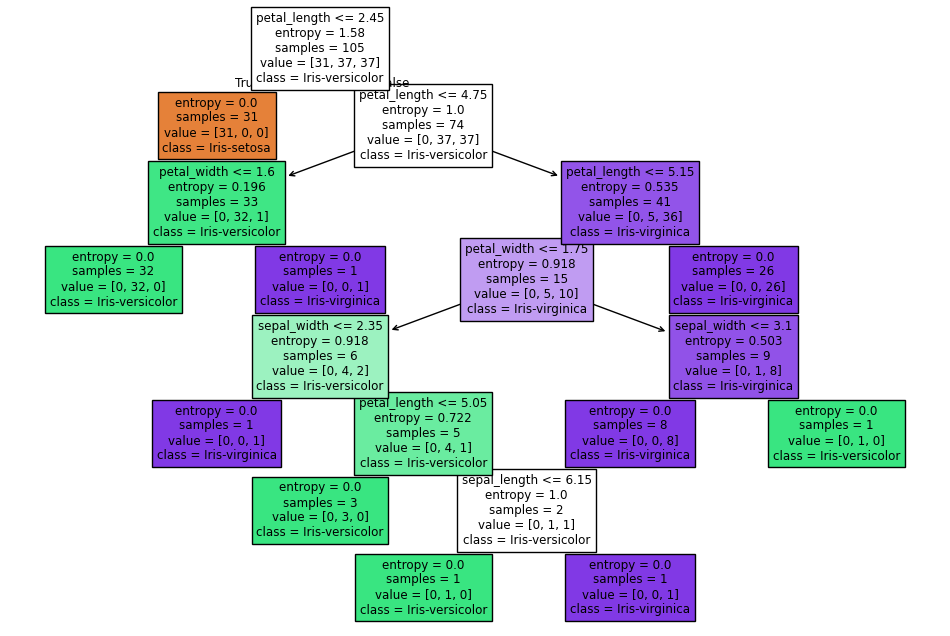

In [24]:
# Membuat model Decision Tree
model = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Melatih model dengan data training
model.fit(X_train, y_train)

# Menampilkan Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, class_names=model.classes_, filled=True)
plt.show()


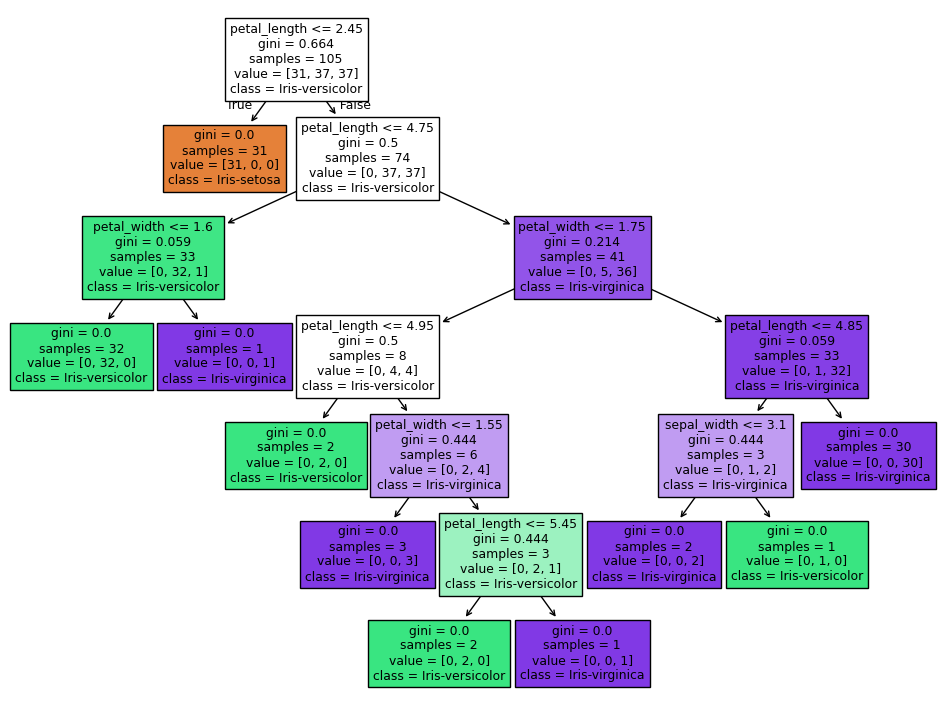

In [25]:
# Membuat model Decision Tree
model = DecisionTreeClassifier(criterion='gini', random_state=42)

# Melatih model dengan data training
model.fit(X_train, y_train)

# Menampilkan Decision Tree
plt.figure(figsize=(12, 9))
plot_tree(model, feature_names=X.columns, class_names=model.classes_, filled=True)
plt.show()


In [26]:
# Membuat prediksi pada data test
y_pred = model.predict(X_test)

# Confusion Matrix
# conf_matrix = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

Accuracy: 100.00%


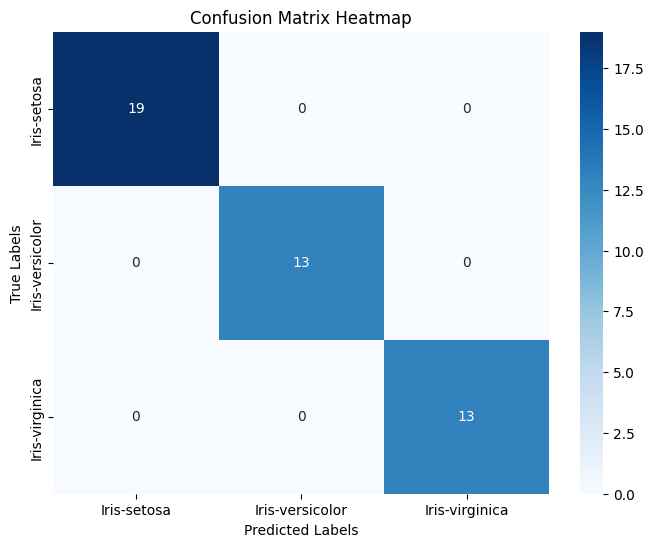

In [27]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualisasi Confusion Matrix dengan Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
